<a href="https://colab.research.google.com/github/RiadMhajne/DataAnalyst/blob/main/payroll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Research question:**
One of the best ways to understand a city and how it works is to analyze the salaries of the various employees residing in the city. This gives an evaluation criteria for the government as well to understand how the citizens are compensated. A closer look at employees and their salaries shows the kind of jobs that are in demand, the kind of jobs which offer the highest packages and can help give job aspirants an idea of which fields have more to offer in terms of monetary benefits. An analysis of the salaries of employees in a city also gives an idea of how demographics within the city affects job positions and incomes.

unzip the tow givven files

In [ ]:
!unzip file2.zip

Archive:  file2.zip
  inflating: processed-payroll.csv   
  inflating: payroll.csv             
  inflating: ReadMe.txt              
  inflating: BigData.pptx            


importing the need libraries 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

open the file as dataframe and drop the wrong(nigative pay) and missing information (nan values)

In [ ]:
df = pd.read_csv("payroll.csv", low_memory=False)
df.dropna(inplace=True)
df = df.loc[(df['REGULAR_PAY'] >= 0)& (df['OVERTIME_PAY'] >= 0)& (df['ALL_OTHER_PAY'] >= 0)& (df['TOTAL_PAY'] >= 0)& (df['CITY_RETIREMENT_CONTRIBUTIONS'] >= 0)& (df['BENEFIT_PAY'] >= 0)]
df

# **analyzing the data**

function that prints top n most paid record and top n least paid records

In [ ]:
def nPaid(df,n):
  nmp = df.sort_values('TOTAL_PAY', ascending=False)[0:n]
  lmp = df.sort_values('TOTAL_PAY', ascending=True)[0:n]
  print(f"            top {n} most paid")
  print()
  for i in range(n):
    ar = nmp.iloc[i].tolist()
    print("record:",ar[0])
    print("year:",ar[1])
    print("department title:",ar[3])
    print("job title:",ar[5])
    print("total pay:",ar[-5])
    print("             -------------------")
  print()
  print(f"            top {n} least paid")
  print()
  for i in range(n):
    ar = lmp.iloc[i].tolist()
    print("record:",ar[0])
    print("year:",ar[1])
    print("department title:",ar[3])
    print("job title:",ar[5])
    print("total pay:",ar[-5])
    print("             -------------------")




function that prints top n most paid jobs , least paid jobs and most comon jobs

In [ ]:
def nPaidJobs(df,n):
  ddf=df
  df = round(df.groupby('JOB_TITLE')['REGULAR_PAY'].sum() / df.groupby('JOB_TITLE')['REGULAR_PAY'].count())
  sdf = df.sort_values(ascending=False)[0:n]
  m = sdf.tolist()
  idx = sdf.index
  plt.title(f"top {n} most paid jobs")
  plt.xlabel("jobs\n\n\n\n\n\n\n")
  plt.ylabel("average pay")
  plt.xticks(rotation=90)
  plt.bar(idx, m, color ='green',
        width = 0.4)
  plt.show()
  print(f"            top {n} most paid jobs")
  print()
  print("                       job                               | average pay")
  print("----------------------------------------------------------------------------")
  for i in range(n):
    print(idx[i]," "*(55-len(idx[i])),f"| {m[i]}")

  sdf = df.sort_values(ascending=True)[0:n]
  m = sdf.tolist()
  idx = sdf.index
  plt.title(f"top {n} least paid jobs")
  plt.xlabel("jobs\n\n\n\n\n\n\n")
  plt.ylabel("payment in average")
  plt.xticks(rotation=90)
  plt.bar(idx, m, color ='red',width = 0.4)
  plt.show()
 
  print()
  print()
  print(f"            top {n} least paid jobs")
  print()
  print("                       job                               | average pay")
  print("----------------------------------------------------------------------------")
  for i in range(n):
    print(idx[i]," "*(55-len(idx[i])),f"| {m[i]}")
  print()
  print()
  job = ddf.groupby("JOB_TITLE")["JOB_TITLE"].count().sort_values(ascending=False)[0:n]
  m = job.tolist()
  idx = job.index
  plt.title(f"top {n} most comon jobs")
  plt.xlabel("jobs\n\n\n\n\n\n\n")
  plt.ylabel("count")
  plt.xticks(rotation=90)
  plt.bar(idx, m, color ='red',width = 0.4)
  plt.show()
  print(f"            top {n} most comon jobs")
  print()
  print("                       job                               | count")
  print("----------------------------------------------------------------------------")
  for i in range(n):
    print(idx[i]," "*(55-len(idx[i])),f"| {m[i]}")
  


analysing the dataset by comparing the valuse of different columns

In [ ]:
def groups_diff(df):
  gn = round(df.groupby("GENDER")["TOTAL_PAY"].sum()/df.groupby("GENDER")["TOTAL_PAY"].count())
  gn=gn.sort_values(ascending=False)
  race = round(df.groupby("ETHNICITY")["TOTAL_PAY"].sum()/df.groupby("ETHNICITY")["TOTAL_PAY"].count())
  race=race.sort_values(ascending=False)
  year = round(df.groupby("PAY_YEAR")["TOTAL_PAY"].sum()/df.groupby("PAY_YEAR")["TOTAL_PAY"].count())
  act = round(df.groupby("JOB_STATUS")["JOB_STATUS"].count())
  m = gn.tolist()
  idx = gn.index
  gn.plot.bar(color = "cyan",rot=0)
  plt.xlabel("gender")
  plt.ylabel("average pay")
  
  plt.show()
  print("gender   | average pay")
  print("----------------------")
  for i in range(len(gn)):
    ar = gn.iloc[i].tolist()
    print(idx[i]," "*(7-len(idx[i])),f"| {m[i]}")
  print()
  print()
  m = race.tolist()
  idx = race.index
  race.plot.bar(color = "black",rot=0)
  plt.xlabel("gender")
  plt.ylabel("average pay")
  plt.xticks(rotation=90)
  plt.show()
  print("ethnicity                       | average pay")
  print("---------------------------------------------")
  for i in range(len(race)):
    print(idx[i]," "*(30-len(idx[i])),f"| {m[i]}")
  print()
  print()
  m = year.tolist()
  idx = year.index
  print("year | average per year")
  print("-----------------------")
  for i in range(len(year)):
    print(idx[i],f"| {m[i]}")
  print()
  print()
  m = act.tolist()
  idx = act.index
  print("status      | count")
  print("-------------------")
  for i in range(len(act)):
    print(idx[i]," "*(10-len(idx[i])),f"| {m[i]}")


plotting a graph of linear regression and calculating correlation between all the numeric columns with "regular pay"

In [ ]:
def linear_corr(df):
  var = ["OVERTIME_PAY","ALL_OTHER_PAY","TOTAL_PAY","CITY_RETIREMENT_CONTRIBUTIONS","BENEFIT_PAY","PAY_YEAR"]
  s = df.loc[:,["OVERTIME_PAY","ALL_OTHER_PAY","TOTAL_PAY","CITY_RETIREMENT_CONTRIBUTIONS","BENEFIT_PAY","PAY_YEAR"]].apply(lambda x: stats.pearsonr(x, df["REGULAR_PAY"]))
  s= pd.Series(s.loc[0],index = s.columns)
  s=s.sort_values(key=lambda x: abs(x),ascending=False)
  idx = np.arange(0,len(s),1)
  plt.title("correlation with regular pay")
  plt.xlabel("variables\n\n\n\n\n\n\n")
  plt.ylabel("correlation value")
  plt.xticks(rotation=45)
  plt.plot(s.index,abs(s.values ))
  plt.show()
  for i in range(len(s)):
    if s.index[i] =="TOTAL_PAY":
       plt.xlim(0,700000)
    elif s.index[i] =="ALL_OTHER_PAY":
       plt.xlim(0,350000)
    elif  s.index[i] =="BENEFIT_PAY":
       plt.xlim(0,65000)
    plt.xlabel(s.index[i])
    plt.ylabel("regular pay")
    m, b = np.polyfit(df[s.index[i]], df["REGULAR_PAY"], 1)
    # plt.set_ylim([-0.5,1.5])
    plt.plot(df[s.index[i]],df["REGULAR_PAY"],"o")
    plt.plot(df[s.index[i]],m*df[s.index[i]]+b)
    plt.show()

In [ ]:
nPaid(df,9)

In [ ]:
 nPaid(df.loc[(df['REGULAR_PAY'] > 0) & (df['JOB_STATUS'] == "ACTIVE")],9)

In [ ]:
nPaidJobs(df,10)

In [ ]:
nPaidJobs(df.loc[(df['REGULAR_PAY'] > 0) & (df['JOB_STATUS'] == "ACTIVE")],10)

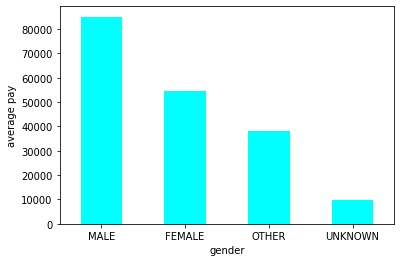

gender   | average pay
----------------------
MALE     | 85118.0
FEMALE   | 54552.0
OTHER    | 38047.0
UNKNOWN  | 9952.0




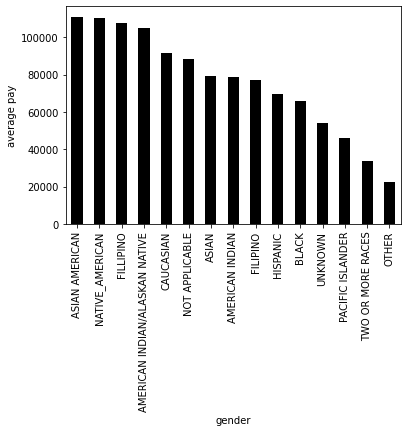

ethnicity                       | average pay
---------------------------------------------
ASIAN AMERICAN                  | 110907.0
NATIVE_AMERICAN                 | 110479.0
FILLIPINO                       | 107841.0
AMERICAN INDIAN/ALASKAN NATIVE  | 105110.0
CAUCASIAN                       | 91701.0
NOT APPLICABLE                  | 88516.0
ASIAN                           | 78960.0
AMERICAN INDIAN                 | 78464.0
FILIPINO                        | 76842.0
HISPANIC                        | 69398.0
BLACK                           | 65772.0
UNKNOWN                         | 53990.0
PACIFIC ISLANDER                | 46156.0
TWO OR MORE RACES               | 33814.0
OTHER                           | 22630.0


year | average per year
-----------------------
2013 | 73385.0
2014 | 77348.0
2015 | 75408.0
2016 | 70639.0
2017 | 73525.0
2018 | 71946.0
2019 | 79480.0
2020 | 88578.0
2021 | 85775.0
2022 | 44444.0


status      | count
-------------------
ACTIVE      | 392712
NOT_ACTIVE 

In [ ]:
groups_diff(df)

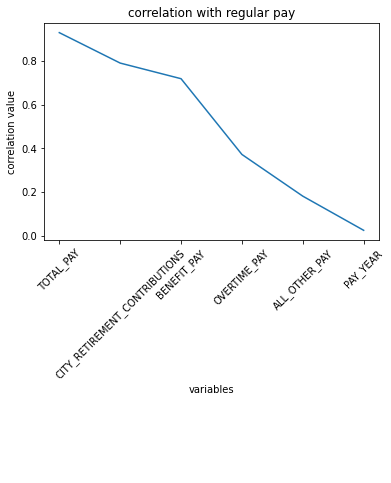

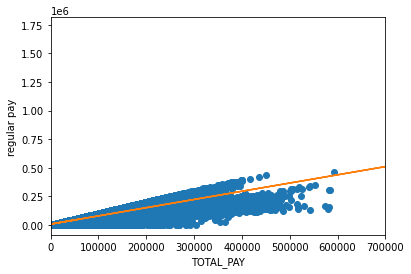

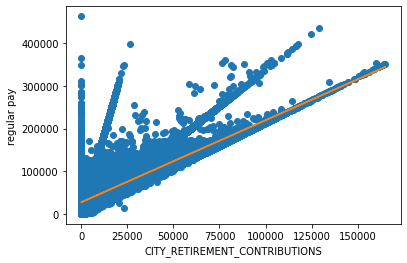

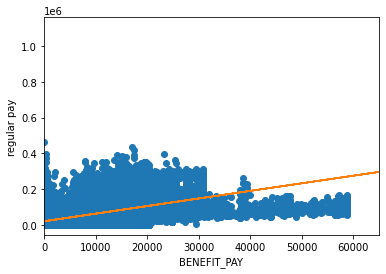

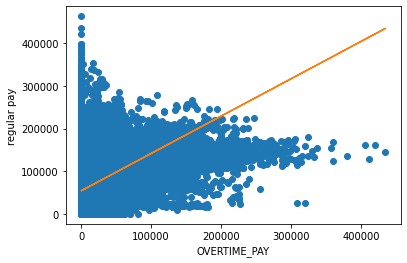

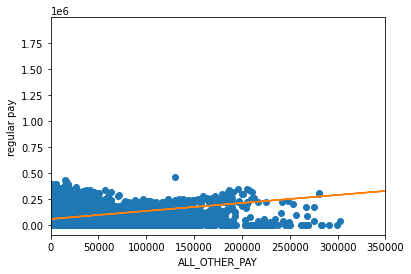

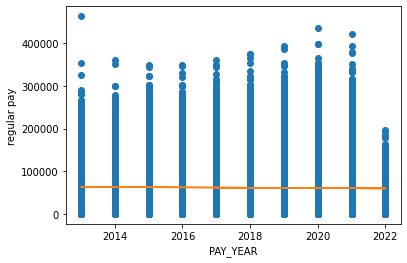

In [ ]:
linear_corr(df)

# **Prediction using machine learning**

preparing the dataset

In [ ]:
df2 = pd.read_csv("processed-payroll.csv", low_memory=False, index_col='REGULAR_PAY')
df2.drop('Unnamed: 0', axis=1, inplace=True)
df2 = df2.loc[(df2['JOB_STATUS'] == 'ACTIVE')& (df2['EMPLOYMENT_TYPE'] == 'FULL_TIME')] #consider just the active and full time employees
df2.drop(['EMPLOYMENT_TYPE', 'JOB_STATUS', 'MOU', 'MOU_TITLE','TOTAL_PAY'], axis=1, inplace=True)# droppping the columns that wont be useful to the prediction
df2

,PAY_YEAR,DEPARTMENT_NO,DEPARTMENT_TITLE,JOB_CLASS_PGRADE,JOB_TITLE,OVERTIME_PAY,ALL_OTHER_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY
REGULAR_PAY,,,,,,,,,,,
55725.24,2017,98,WATER AND POWER,3156,CUSTODIAN,4785.05,2021.84,3678.00,23508.90,FEMALE,HISPANIC
139174.88,2017,98,WATER AND POWER,9105,UTILITY ADMINISTRATOR,16340.50,6170.49,9186.00,23508.90,FEMALE,ASIAN AMERICAN
245879.12,2017,98,WATER AND POWER,9602,WATER SERVICES MANAGER,0.00,12504.30,16228.00,23508.90,MALE,BLACK
101494.34,2017,98,WATER AND POWER,5885,WTR TRTMT OPR,7824.99,12630.52,6699.00,23508.90,MALE,ASIAN AMERICAN
101345.12,2017,98,WATER AND POWER,3841,ELTL MCHC,22284.37,1566.75,6689.00,23508.90,MALE,HISPANIC
...,...,...,...,...,...,...,...,...,...,...,...
100406.40,2022,12,CITY ATTORNEY,597,DEPUTY CITY ATTORNEY IV,0.00,0.00,29780.54,10521.00,MALE,ASIAN
69062.40,2022,42,HARBOR,9485,SENIOR CIVIL ENGINEER,0.00,9193.85,20483.91,10317.36,MALE,HISPANIC
32927.90,2022,4,AIRPORTS,3181,SECURITY OFFICER,4855.63,2533.37,9766.42,4166.52,MALE,CAUCASIAN


changing the string columins to numeric

In [ ]:


# labelling the categorical variables

jtl = df2['JOB_TITLE'].unique().tolist()
jti = [x for x in range(len(jtl))]
df2['JOB_TITLE'].replace(jtl, jti, inplace=True)


df2.drop('DEPARTMENT_TITLE', axis=1, inplace=True)

gl = df2['GENDER'].unique().tolist()
gi = [x for x in range(len(gl))]
df2['GENDER'].replace(gl, gi , inplace=True)

el = df2['ETHNICITY'].unique().tolist()
ei = [x for x in range(len(el))]
df2['ETHNICITY'].replace(el, ei, inplace=True)

df2

,PAY_YEAR,DEPARTMENT_NO,JOB_CLASS_PGRADE,JOB_TITLE,OVERTIME_PAY,ALL_OTHER_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY
REGULAR_PAY,,,,,,,,,,
55725.24,2017,98,3156,0,4785.05,2021.84,3678.00,23508.90,0,0
139174.88,2017,98,9105,1,16340.50,6170.49,9186.00,23508.90,0,1
245879.12,2017,98,9602,2,0.00,12504.30,16228.00,23508.90,1,2
101494.34,2017,98,5885,3,7824.99,12630.52,6699.00,23508.90,1,1
101345.12,2017,98,3841,4,22284.37,1566.75,6689.00,23508.90,1,0
...,...,...,...,...,...,...,...,...,...,...
100406.40,2022,12,597,446,0.00,0.00,29780.54,10521.00,1,7
69062.40,2022,42,9485,390,0.00,9193.85,20483.91,10317.36,1,0
32927.90,2022,4,3181,416,4855.63,2533.37,9766.42,4166.52,1,3


splitting the data (test and train)

In [ ]:
y = df2.index//1000
"""
divide the data set by 1000 to make categories instead of amount of money
for example:
  0-999 is labeled by 0
  1-1999 is labeled by 1
  45-45999 is labeled by 45
  ...
  etc
"""
X = df2[['PAY_YEAR', 'DEPARTMENT_NO', 'JOB_CLASS_PGRADE', 'JOB_TITLE', 'OVERTIME_PAY', 'ALL_OTHER_PAY', 'CITY_RETIREMENT_CONTRIBUTIONS', 'BENEFIT_PAY', 'GENDER', 'ETHNICITY']].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)
print(f"Training set shape: ({X_train.shape}, {y_train.shape})")
print(f"Testing set shape: ({X_test.shape}, {y_test.shape})")


Training set shape: ((269231, 10), (269231,))
Testing set shape: ((67308, 10), (67308,))


Prediction using decision tree classifier

In [ ]:
dt = tree.DecisionTreeClassifier().fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print(f"Decision tree accuracy:{metrics.accuracy_score(y_test,dt_pred)}")

Decision tree accuracy:0.88182682593451


Prediction using random forest classifier

In [ ]:
rf = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(f"Random Forest accuracy:{metrics.accuracy_score(y_test,rf_pred)}")

Random Forest accuracy:0.6984459499613717


Prediction using random forest regressor

In [ ]:
y = df2.index
X = df2[['PAY_YEAR', 'DEPARTMENT_NO', 'JOB_CLASS_PGRADE', 'JOB_TITLE', 'OVERTIME_PAY', 'ALL_OTHER_PAY', 'CITY_RETIREMENT_CONTRIBUTIONS', 'BENEFIT_PAY', 'GENDER', 'ETHNICITY']].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)
rfr = RandomForestRegressor(n_estimators=100, random_state=1).fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)
print(f"error radios: {mean_absolute_error(y_test, rfr_pred)}")

mean absolute error: 1131.5150977629814


# **note**

we can see that Decision Tree algorithm is much more accurate from the random forest classifier 
even though the accuracy of the Decision Tree is around 88 that is not accurate
because in our case when the Decision Tree predict 6999
instead of 7000 the algorithm think that the prediction is wrong where when the decision Tree predict 6999 instead of 6000 the algorithm accept the prediction as success even though the gap is bigger (the same thing happen to RandomForestClassifier)

that's why I used RandomForestRegressor algorithm which calculate the error radios instead 